In [1]:
import csv
import numpy as np

#read csv file and convert it to a numpy array
f = open(r'ratings.csv','r') 
#rating.csv can be downloaded from this link: https://drive.google.com/open?id=0B-FhQn7HmAeANlAtVjhJb19QZU0
data = np.array(list(csv.reader(f))) 
data

array([['user', 'starwars', 'spiderman', 'superman', 'batman'],
       ['john', '5', '6', '7', '9'],
       ['david', '6', '9', '4', '8'],
       ['alex', '4', '6', '8', '9'],
       ['james', '8', '7', '9', '6'],
       ['sally', '5', '8', '7', '6'],
       ['anna', '8', '6', '8', '5'],
       ['andrey', '6', '7', '4', '8'],
       ['maria', '4', '8', '9', '7'],
       ['brian', '6', '8', '7', '5'],
       ['johnny', '6', '8', '5', '9']], 
      dtype='<U9')

In [2]:
#extract only numerical information from the previous numpy array
data2 = np.array(data[1:,1:],dtype=float)
data2

array([[ 5.,  6.,  7.,  9.],
       [ 6.,  9.,  4.,  8.],
       [ 4.,  6.,  8.,  9.],
       [ 8.,  7.,  9.,  6.],
       [ 5.,  8.,  7.,  6.],
       [ 8.,  6.,  8.,  5.],
       [ 6.,  7.,  4.,  8.],
       [ 4.,  8.,  9.,  7.],
       [ 6.,  8.,  7.,  5.],
       [ 6.,  8.,  5.,  9.]])

In [3]:
#write a function which accepts two 1-d numpy arrays each of which we treat as a point in a 4-d space 
#the function returns the euclidean distance between those two points
def find_distance(p1,p2):
    distance = (((p1 - p2)**2).sum())**0.5
    return distance

In [4]:
#find rhe distances between all possible pairs of users from our dataset and form a matrix of distances
dists_matrix = []
for i in range(len(data2)):
    dists = []
    for j in range(len(data2)):
        if i != j:
            dists.append(find_distance(data2[i],data2[j]))
        else:
            dists.append(0)
    dists_matrix.append(dists)
    
print(np.array(dists_matrix))

[[ 0.          4.47213595  1.41421356  4.79583152  3.60555128  5.09901951
   3.46410162  3.60555128  4.58257569  3.        ]
 [ 4.47213595  0.          5.47722558  6.08276253  3.87298335  6.164414    2.
   5.56776436  4.35889894  1.73205081]
 [ 1.41421356  5.47722558  0.          5.19615242  3.87298335  5.65685425
   4.69041576  3.          5.          4.12310563]
 [ 4.79583152  6.08276253  5.19615242  0.          3.74165739  1.73205081
   5.74456265  4.24264069  3.16227766  5.47722558]
 [ 3.60555128  3.87298335  3.87298335  3.74165739  0.          3.87298335
   3.87298335  2.44948974  1.41421356  3.74165739]
 [ 5.09901951  6.164414    5.65685425  1.73205081  3.87298335  0.
   5.47722558  5.          3.          5.74456265]
 [ 3.46410162  2.          4.69041576  5.74456265  3.87298335  5.47722558
   0.          5.56776436  4.35889894  1.73205081]
 [ 3.60555128  5.56776436  3.          4.24264069  2.44948974  5.
   5.56776436  0.          3.46410162  4.89897949]
 [ 4.58257569  4.3588989

In [5]:
#find the average distances
mean = np.unique(np.array(dists_matrix))[1:].mean()
mean

4.2442838657366995

In [6]:
#create a similarity matrix where 1 indicates users having similar taste and 0 indicates the opposite
similarity_matrix = []
for i in range(len(dists_matrix)):
    row = []
    for j in range(len(dists_matrix[i])):
        if i!=j:
            if dists_matrix[i][j]<mean:
                row.append(1)
            else:
                row.append(0)
        else:
            row.append(0)
    similarity_matrix.append(row)
    
similarity_matrix

[[0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 1, 0, 0, 0]]

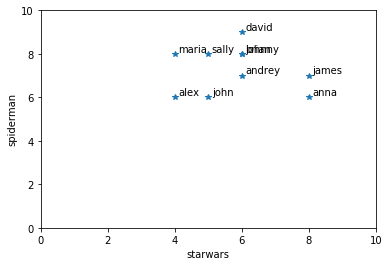

In [7]:
#write a function to plot the users on a 2d plane on the basis of the ratings they gave to 2 of the movies
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_plane(data, film1, film2):
    x=[]
    y=[]
    header = data[0]
    for i in range(1,len(data)):
        x.append(float(data[i,np.where(header==film1)[0][0]]))
        y.append(float(data[i,np.where(header==film2)[0][0]]))
        plt.text(x[-1]+0.1, y[-1]+0.1, data[i,0])
            
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.xlabel(film1)
    plt.ylabel(film2)
    plt.plot(x,y,'*')
    
plot_on_plane(data,'starwars','spiderman')